# Covid 19 Data analysis using python

This project aims at finding a correlation between covid spread in nations and world happines report.

### Imports

In [46]:
#import
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as plt

#dataset from data.world
df = pd.read_csv('datasets/time_series_covid19_confirmed_global.csv') 


In [64]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,918,922,925,925,925,937,939,939,944,955
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538


In [14]:
df.shape

(266, 203)

In [19]:
df.drop(["Lat", "Long"], axis = 1, inplace = True)

In [20]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015
1,NaN,Albania,0,0,0,0,0,0,0,0,...,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,918,922,925,925,925,937,939,939,944,955
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538


### Aggregating Rows by country

In [24]:
df_aggregated = df.groupby("Country/Region").sum()

In [25]:
df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015
Albania,0,0,0,0,0,0,0,0,0,0,...,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151
Algeria,0,0,0,0,0,0,0,0,0,0,...,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155
Andorra,0,0,0,0,0,0,0,0,0,0,...,918,922,925,925,925,937,939,939,944,955
Angola,0,0,0,0,0,0,0,0,0,0,...,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538


In [28]:
df_aggregated.shape

(188, 199)

### Visualising various country data
As we are well aware, it is in China'a Wuhan that the first corona virus case was recorded. If we take a look at the graph, we understand the first offical case was reported on 

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


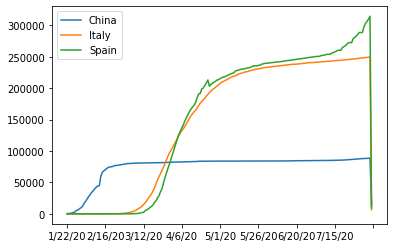

In [99]:
china = df_aggregated.loc['China'].plot()
italy = df_aggregated.loc['Italy'].plot()
spain = df_aggregated.loc['Spain'].plot()
china.legend()
italy.legend()
spain.legend()


### Calculating and plotting first derivative of the curve

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


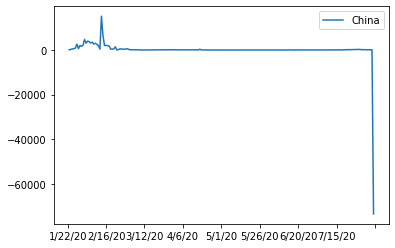

In [100]:
china_diff = df_aggregated.loc['China'].diff().plot()
china_diff.legend()


Now let's consired the maximun infection rate in the worst affceted and first hit countries - 
#### China, Italy and Spain


In [61]:
df_aggregated.loc['China'].diff().max()

15136.0

This means, 15,136 cases has been reported in 24 hours. Similarly for Italy and Spain.

In [62]:
df_aggregated.loc['Italy'].diff().max()

6557.0

In [63]:
df_aggregated.loc['Spain'].diff().max()

9630.0

### Maximum infection rate of all countries

In [68]:
countries = list(df_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(df_aggregated.loc[c].diff().max())

In [71]:
df_aggregated["max_affcted_rate"] = max_infection_rates

In [72]:
df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,max_affcted_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36542,36675,36710,36710,36747,36782,36829,36896,37015,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5197,5276,5396,5519,5620,5750,5889,6016,6151,139.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,29831,30394,30950,31465,31972,32504,33055,33626,34155,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,922,925,925,925,937,939,939,944,955,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1109,1148,1164,1199,1280,1344,1395,1483,1538,88.0


In [75]:
corona_data = pd.DataFrame(df_aggregated["max_affcted_rate"])

In [76]:
corona_data.head()

,max_affcted_rate
Country/Region,
Afghanistan,915.0
Albania,139.0
Algeria,675.0
Andorra,79.0
Angola,88.0


### Happiness Report 

In [96]:
happiness_report = pd.read_csv('datasets/datasets-569763-1033439-WHR20_DataForFigure2.1.csv')

In [97]:
happiness_report.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [126]:
unnecessary_columns = [ "Standard error of ladder score","upperwhisker","lowerwhisker" ]

In [127]:
happiness_report.drop(unnecessary_columns, axis = 1, inplace = True)



In [128]:
#happiness_report.set_index("Country name", inplace = True)

happiness_report.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,10.639267,0.954330,71.900825,0.949172
Denmark,10.774001,0.955991,72.402504,0.951444
Switzerland,10.979933,0.942847,74.102448,0.921337
Iceland,10.772559,0.974670,73.000000,0.948892
Norway,11.087804,0.952487,73.200783,0.955750


### Join Dataset

#### Corona Datatset 

In [121]:
corona_data.head()


,max_affcted_rate
Country/Region,
Afghanistan,915.0
Albania,139.0
Algeria,675.0
Andorra,79.0
Angola,88.0


In [122]:
corona_data.shape

(188, 1)

#### Happiness Report Dataset

In [129]:
happiness_report.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,10.639267,0.954330,71.900825,0.949172
Denmark,10.774001,0.955991,72.402504,0.951444
Switzerland,10.979933,0.942847,74.102448,0.921337
Iceland,10.772559,0.974670,73.000000,0.948892
Norway,11.087804,0.952487,73.200783,0.955750


In [130]:
happiness_report.shape

(153, 4)

#### Join 

In [132]:
data = corona_data.join(happiness_report, how = "inner")

In [133]:
data.head()

,max_affcted_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,7.462861,0.470367,52.590000,0.396573
Albania,139.0,9.417931,0.671070,68.708138,0.781994
Algeria,675.0,9.537965,0.803385,65.905174,0.466611
Argentina,7513.0,9.810955,0.900568,68.803802,0.831132
Armenia,771.0,9.100476,0.757479,66.750656,0.712018


#### Correlation Matrix

In [134]:
data.corr()

,max_affcted_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_affcted_rate,1.000000,0.096141,0.053316,0.085503,0.098241
Logged GDP per capita,0.096141,1.000000,0.788877,0.858725,0.440761
Social support,0.053316,0.788877,1.000000,0.764977,0.486838
Healthy life expectancy,0.085503,0.858725,0.764977,1.000000,0.478732
Freedom to make life choices,0.098241,0.440761,0.486838,0.478732,1.000000


This table shows 

### Visualisation of results

In [135]:
data.head()

,max_affcted_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,7.462861,0.470367,52.590000,0.396573
Albania,139.0,9.417931,0.671070,68.708138,0.781994
Algeria,675.0,9.537965,0.803385,65.905174,0.466611
Argentina,7513.0,9.810955,0.900568,68.803802,0.831132
Armenia,771.0,9.100476,0.757479,66.750656,0.712018


#### GDP Vs. Maximum infection rate

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='max_affcted_rate'>

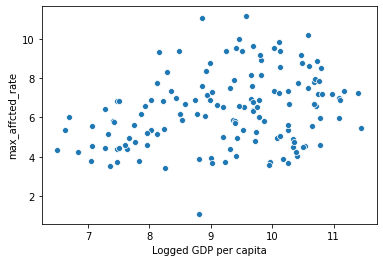

In [138]:
x = data["Logged GDP per capita"]
y = data["max_affcted_rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='max_affcted_rate'>

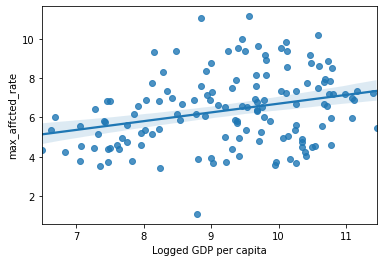

In [139]:
sns.regplot(x, np.log(y))

#### Social support Vs. Maximum infection rate

<AxesSubplot:xlabel='Social support', ylabel='max_affcted_rate'>

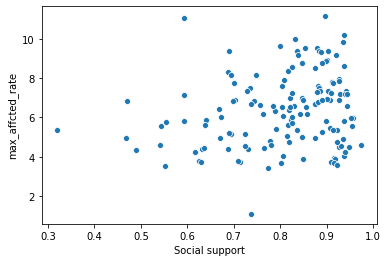

In [142]:
x = data["Social support"]
y = data["max_affcted_rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='max_affcted_rate'>

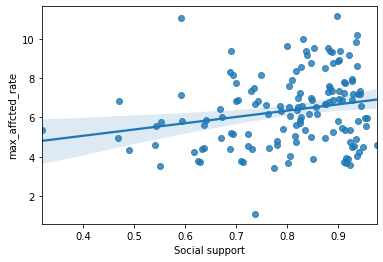

In [143]:
sns.regplot(x, np.log(y))

#### Life expectancy Vs. Maximum infection rate

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_affcted_rate'>

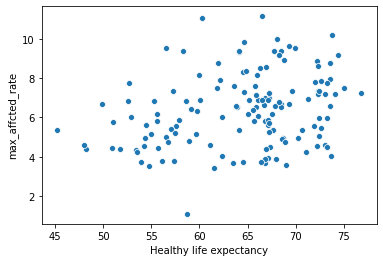

In [146]:
x = data["Healthy life expectancy"]
y = data["max_affcted_rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_affcted_rate'>

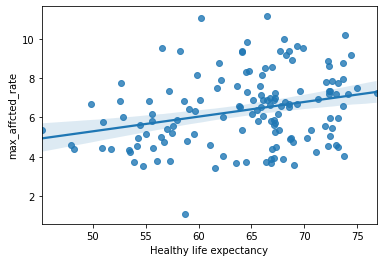

In [147]:
sns.regplot(x, np.log(y))

#### Freedom to make life choices vs Maximum infection rate

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_affcted_rate'>

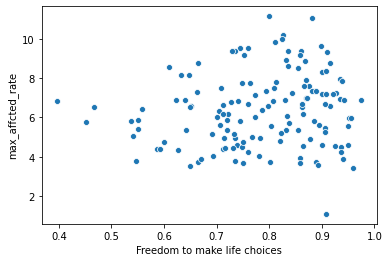

In [149]:
x = data["Freedom to make life choices"]
y = data["max_affcted_rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_affcted_rate'>

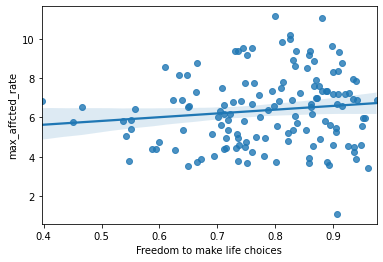

In [150]:
sns.regplot(x, np.log(y))

### Inferences

We observe that people living in developed countries are more likely to be infected with corona virus that that of people living developing countries. This need not be true as there is a possibilty for reported numbers to be less in less developed countries due to lack of testing.

Further analysis to be continued.

### India

In [ ]:
#To be continued
